In [33]:
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [34]:
label_names = {
    0: 'Bags',
    1: 'Bottomwear',
    2: 'Dress',
    3: 'Flip Flops',
    4: 'Shoes',
    5: 'Sandal',
    6: 'Topwear'
}

In [35]:
def preprocess_image(image):
    image = image.resize((224, 224))
    image_array = np.array(image)
    image_array = image_array.astype('float32') / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image_array

In [36]:
def load_model(model_path):
    loaded_model = tf.keras.models.load_model(model_path)
    return loaded_model

In [37]:
def predict_image(model, image_array):
    predictions = model.predict(image_array)
    predicted_label = np.argmax(predictions)
    probability = predictions[0, predicted_label]
    return predicted_label, probability

In [38]:
def parse_images_in_folder(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.webp', '.hpg'))]
    images_data = []
    for file in image_files:
        image_path = os.path.join(folder_path, file)
        image = Image.open(image_path)
        preprocessed_image = preprocess_image(image)
        images_data.append((image, preprocessed_image))
    return images_data

In [39]:
model_path = 'CNN_model_11032024.keras'
model = load_model(model_path)

model.summary()

images_folder_path = 'clothing_test_dataset/'

images_data = parse_images_in_folder(images_folder_path)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,046,359 (110.80 MB)

 Trainable params: 9,682,119 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,364,240 (73.87 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predicted Label for 1.jpg: Bottomwear
Probability: 100.00%


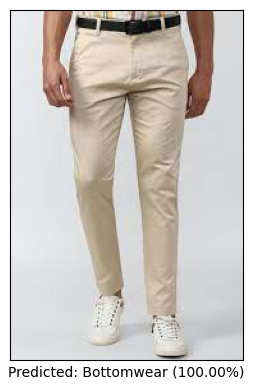

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Label for 11.webp: Bottomwear
Probability: 56.88%


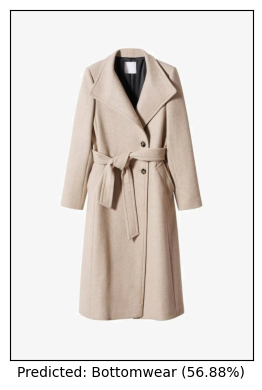

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Label for 12.webp: Sandal
Probability: 78.74%


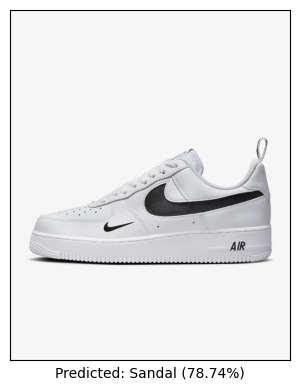

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Label for 15.jpg: Bags
Probability: 99.82%


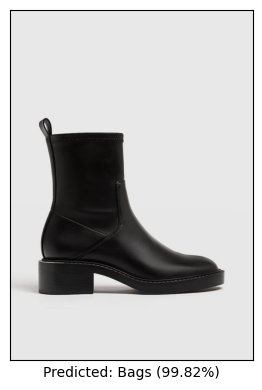

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Label for 17.jpg: Bottomwear
Probability: 61.60%


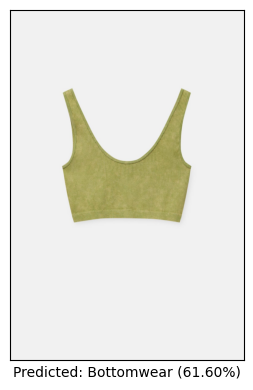

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Label for 18.webp: Bottomwear
Probability: 87.81%


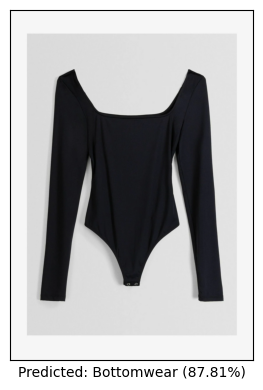

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Label for 19.webp: Topwear
Probability: 96.45%


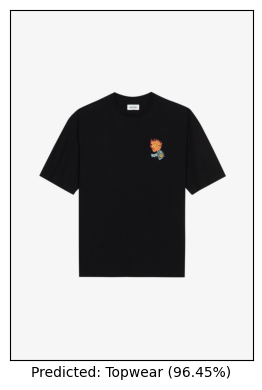

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Label for 2.jpg: Bottomwear
Probability: 99.49%


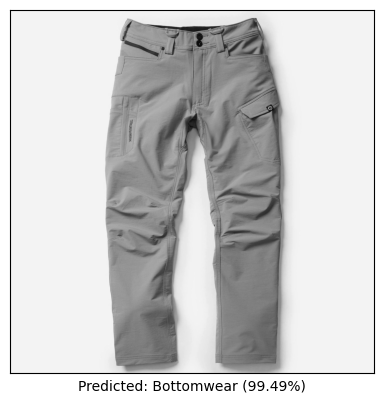

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Label for 20.webp: Topwear
Probability: 64.04%


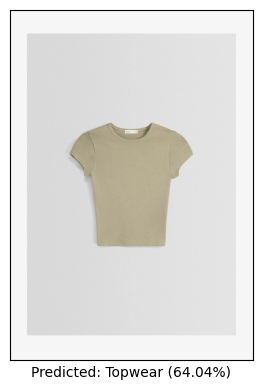

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Label for 21.webp: Sandal
Probability: 77.11%


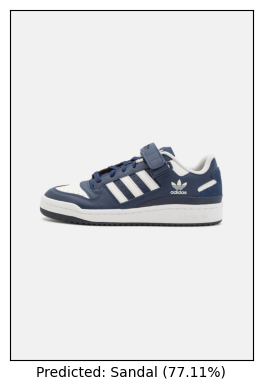

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Label for 22.webp: Sandal
Probability: 70.03%


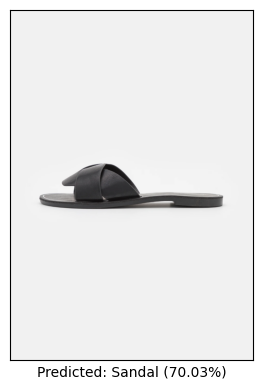

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Label for 23.webp: Dress
Probability: 53.90%


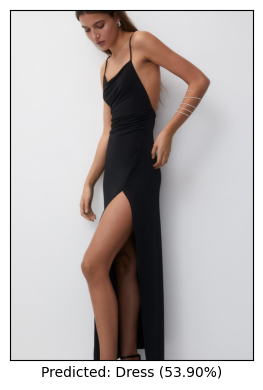

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Label for 25.webp: Dress
Probability: 91.68%


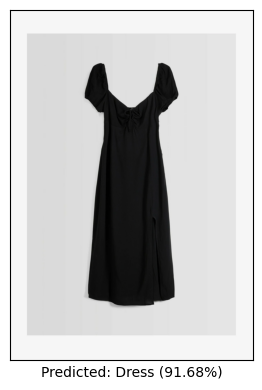

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Label for 27.webp: Sandal
Probability: 97.44%


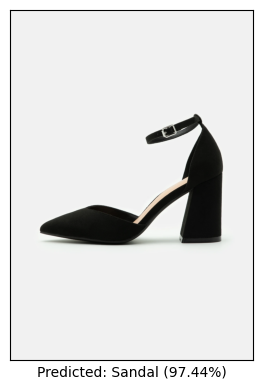

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Label for 28.webp: Sandal
Probability: 98.03%


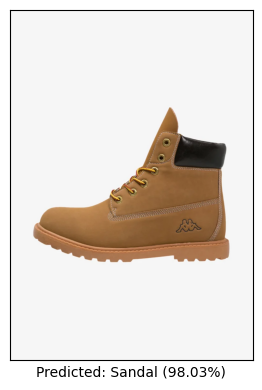

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Label for 3.jpg: Topwear
Probability: 97.24%


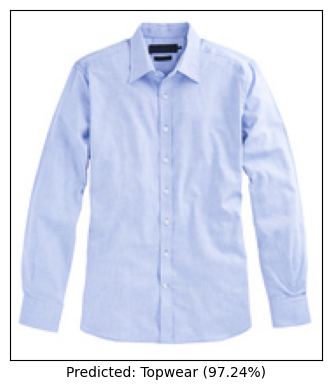

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Label for 4.jpg: Bags
Probability: 95.97%


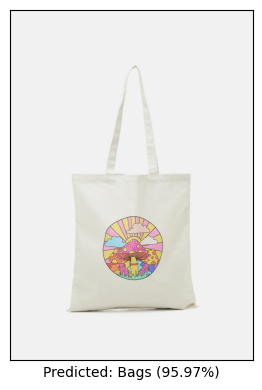

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Label for 5.jpg: Topwear
Probability: 99.93%


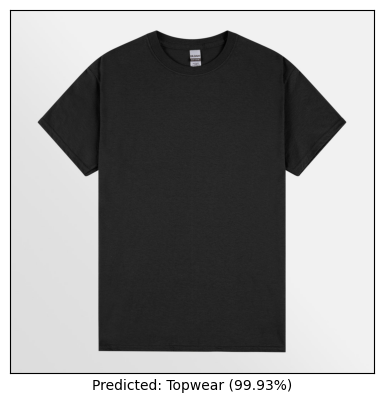

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Label for 6.jpg: Topwear
Probability: 99.88%


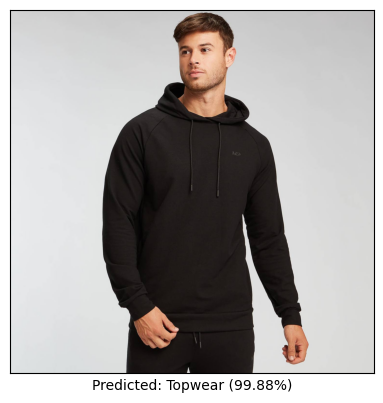

In [40]:
for image, preprocessed_image in images_data:
    predicted_label, probability = predict_image(model, preprocessed_image)

    # retrieving the label name using a dictionary
    predicted_label_name = label_names[predicted_label]

    print(f"Predicted Label for {os.path.basename(image.filename)}: {predicted_label_name}")
    print(f"Probability: {probability * 100:.2f}%")

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.xlabel(f'Predicted: {predicted_label_name} ({probability * 100:.2f}%)')
    plt.xticks([])
    plt.yticks([])

    plt.tight_layout()
    plt.show()